# Handwritten digit recognition using KNN

In [1]:
# Import plotting tool
import matplotlib.pyplot as plt
%matplotlib notebook

# Import classifiers
from sklearn.neighbors import KNeighborsClassifier

# Import datasets and performance metrics
from sklearn import datasets, metrics

# The digits dataset
digits = datasets.load_digits()

In [2]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
(n_samples, width, height) = digits.images.shape
#data = digits.images.reshape(n_samples, -1)
data = digits.images.reshape(n_samples, width * height)

In [3]:
# Create a classifier: a K Neighbors Classifier classifier
classifier = KNeighborsClassifier(n_neighbors=13)

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, train_size=0.6)

In [5]:
# We learn the digits on the first 60% of the digits
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [6]:
# Now predict the value of the digit on the remaining
expected = y_test
predicted = classifier.predict(X_test)

In [7]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        63
          1       0.94      1.00      0.97        76
          2       0.99      0.99      0.99        71
          3       0.99      0.98      0.98        84
          4       0.98      0.93      0.95        55
          5       0.99      0.95      0.97        77
          6       0.96      0.99      0.97        76
          7       0.95      1.00      0.97        70
          8       0.94      0.87      0.90        75
          9       0.95      0.96      0.95        72

avg / total       0.97      0.97      0.96       719


Confusion matrix:
[[63  0  0  0  0  0  0  0  0  0]
 [ 0 76  0  0  0  0  0  0  0  0]
 [ 1  0 70  0  0  0  0  0  0  0]
 [ 0  0  0 82  0  0  0  1  1  0]
 [ 0  0

<IPython.core.display.Javascript object>


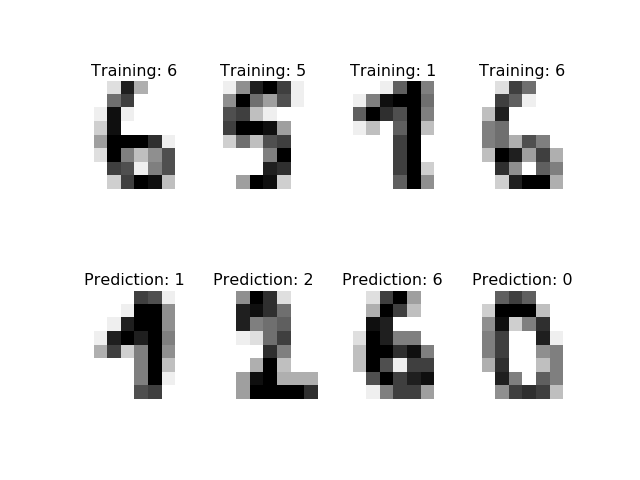

In [8]:
images_and_labels = list(zip(X_train.reshape(len(X_train),width,height), y_train))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

images_and_predictions = list(zip(X_test.reshape(len(X_test),width,height), predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()